In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy.stats import percentileofscore
import itertools
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from investing.data import bse

In [4]:
df = bse.sensex()

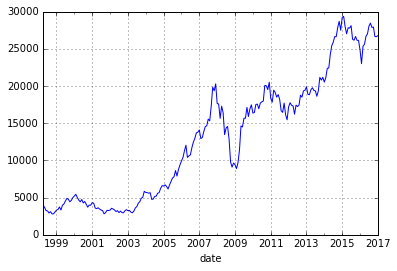

In [16]:
df.close.plot(grid=True)

In [11]:
df[['pe', 'pb', 'dividend_yield']].describe()

,pe,pb,dividend_yield
count,226.000000,226.000000,226.000000
mean,18.410088,3.320398,1.521416
std,3.338986,0.912495,0.374922
min,10.270000,1.730000,0.850000
25%,16.400000,2.710000,1.230000
50%,18.285000,3.055000,1.455000
75%,20.587500,3.725000,1.757500
max,29.390000,6.540000,2.520000


In [12]:
df[['y1', 'y2', 'y3', 'y5', 'y10']].describe()

,y1,y2,y3,y5,y10
count,214.000000,202.000000,190.000000,166.000000,106.000000
mean,0.165022,0.339055,0.565860,1.203455,3.192339
std,0.301420,0.468625,0.707105,1.243820,1.169575
min,-0.530412,-0.409876,-0.397160,-0.261310,0.899041
25%,-0.051861,-0.026428,0.096796,0.341406,2.434086
50%,0.127416,0.258498,0.328352,0.718281,3.185817
75%,0.389749,0.668949,0.860377,1.534495,4.123119
max,0.956727,1.513582,3.068721,5.726293,5.589718


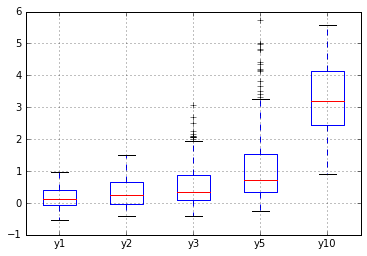

In [15]:
df[['y1', 'y2', 'y3', 'y5', 'y10']].boxplot(return_type='axes')

In [13]:
df[['ay1', 'ay2', 'ay3', 'ay5', 'ay10']].describe()

,ay1,ay2,ay3,ay5,ay10
count,214.000000,202.000000,190.000000,166.000000,106.000000
mean,0.165022,0.139646,0.138063,0.147654,0.149665
std,0.301420,0.201150,0.162022,0.113232,0.034767
min,-0.530412,-0.231805,-0.155238,-0.058777,0.066236
25%,-0.051861,-0.013308,0.031277,0.060503,0.131308
50%,0.127416,0.121828,0.099267,0.114343,0.153926
75%,0.389749,0.291863,0.229888,0.204420,0.177479
max,0.956727,0.585428,0.596440,0.464047,0.207499


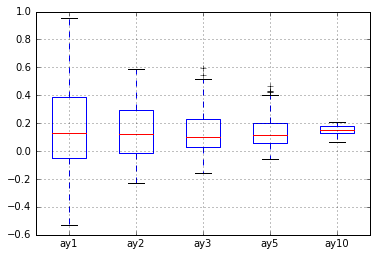

In [49]:
ax = df[['ay1', 'ay2', 'ay3', 'ay5', 'ay10']].boxplot(return_type='axes')

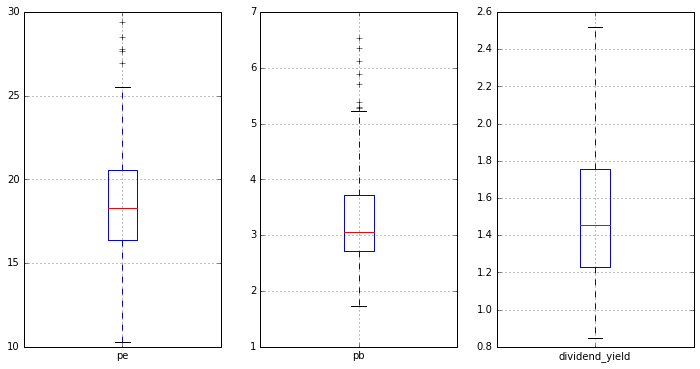

In [97]:
f, a = plt.subplots(1, 3, figsize=(12,6))
df[['pe']].boxplot(return_type='axes', ax=a[0])
df[['pb']].boxplot(return_type='axes', ax=a[1])
df[['dividend_yield']].boxplot(return_type='axes', ax=a[2])

In [45]:
print(df.pe.median(), df.pe[-1], df.pe[-1]/df.pe.median(), df.close[-1]*(1/(df.pe[-1]/df.pe.median())))

18.285 20.83 1.13918512442 23489.7993543


In [40]:
print(percentileofscore(df.pe, df.pe[-1]))
print(percentileofscore(df.pb, df.pb[-1]))
print(percentileofscore(df.dividend_yield, df.dividend_yield[-1]))

78.7610619469
25.2212389381
52.8761061947


[('pe', 'y1'), ('pe', 'y2'), ('pe', 'y3'), ('pe', 'y5'), ('pe', 'y10'), ('pb', 'y1'), ('pb', 'y2'), ('pb', 'y3'), ('pb', 'y5'), ('pb', 'y10'), ('dividend_yield', 'y1'), ('dividend_yield', 'y2'), ('dividend_yield', 'y3'), ('dividend_yield', 'y5'), ('dividend_yield', 'y10')]
Axes(0.125,0.672059;0.133621x0.227941) ('pe', 'y1')
Axes(0.285345,0.672059;0.133621x0.227941) ('pe', 'y2')
Axes(0.44569,0.672059;0.133621x0.227941) ('pe', 'y3')
Axes(0.606034,0.672059;0.133621x0.227941) ('pe', 'y5')
Axes(0.766379,0.672059;0.133621x0.227941) ('pe', 'y10')
Axes(0.125,0.398529;0.133621x0.227941) ('pb', 'y1')
Axes(0.285345,0.398529;0.133621x0.227941) ('pb', 'y2')
Axes(0.44569,0.398529;0.133621x0.227941) ('pb', 'y3')
Axes(0.606034,0.398529;0.133621x0.227941) ('pb', 'y5')
Axes(0.766379,0.398529;0.133621x0.227941) ('pb', 'y10')
Axes(0.125,0.125;0.133621x0.227941) ('dividend_yield', 'y1')
Axes(0.285345,0.125;0.133621x0.227941) ('dividend_yield', 'y2')
Axes(0.44569,0.125;0.133621x0.227941) ('dividend_yield', 

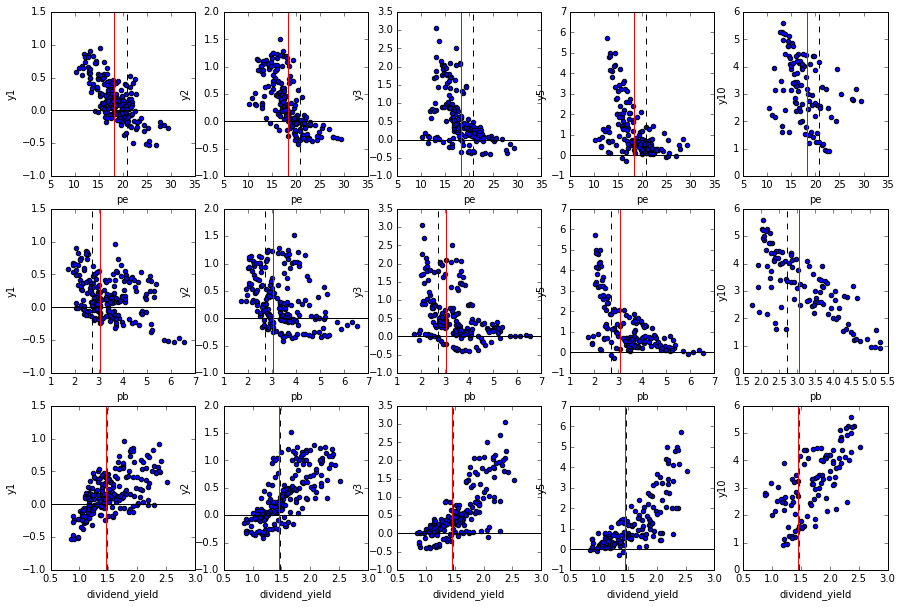

In [90]:
f, a = plt.subplots(3, 5, figsize=(15, 10))
#a = np.ndarray.flatten(a)
a = a.flatten()
py = list(itertools.product(['pe', 'pb', 'dividend_yield'], ['y1', 'y2', 'y3', 'y5', 'y10']))
print(py)
for ax, py in zip(a, py):
    print(ax, py)
    p, y = py
    ax = df.plot(kind='scatter', x = p, y = y, ax = ax)
    ax.axhline(0, color='k')
    ax.axvline(df[p].median(), color='r')
    ax.axvline(df[p][-1], color='k', linestyle='--')

[('pe', 'ay1'), ('pe', 'ay2'), ('pe', 'ay3'), ('pe', 'ay5'), ('pe', 'ay10'), ('pb', 'ay1'), ('pb', 'ay2'), ('pb', 'ay3'), ('pb', 'ay5'), ('pb', 'ay10'), ('dividend_yield', 'ay1'), ('dividend_yield', 'ay2'), ('dividend_yield', 'ay3'), ('dividend_yield', 'ay5'), ('dividend_yield', 'ay10')]
Axes(0.125,0.672059;0.133621x0.227941) ('pe', 'ay1')
Axes(0.285345,0.672059;0.133621x0.227941) ('pe', 'ay2')
Axes(0.44569,0.672059;0.133621x0.227941) ('pe', 'ay3')
Axes(0.606034,0.672059;0.133621x0.227941) ('pe', 'ay5')
Axes(0.766379,0.672059;0.133621x0.227941) ('pe', 'ay10')
Axes(0.125,0.398529;0.133621x0.227941) ('pb', 'ay1')
Axes(0.285345,0.398529;0.133621x0.227941) ('pb', 'ay2')
Axes(0.44569,0.398529;0.133621x0.227941) ('pb', 'ay3')
Axes(0.606034,0.398529;0.133621x0.227941) ('pb', 'ay5')
Axes(0.766379,0.398529;0.133621x0.227941) ('pb', 'ay10')
Axes(0.125,0.125;0.133621x0.227941) ('dividend_yield', 'ay1')
Axes(0.285345,0.125;0.133621x0.227941) ('dividend_yield', 'ay2')
Axes(0.44569,0.125;0.133621x0.

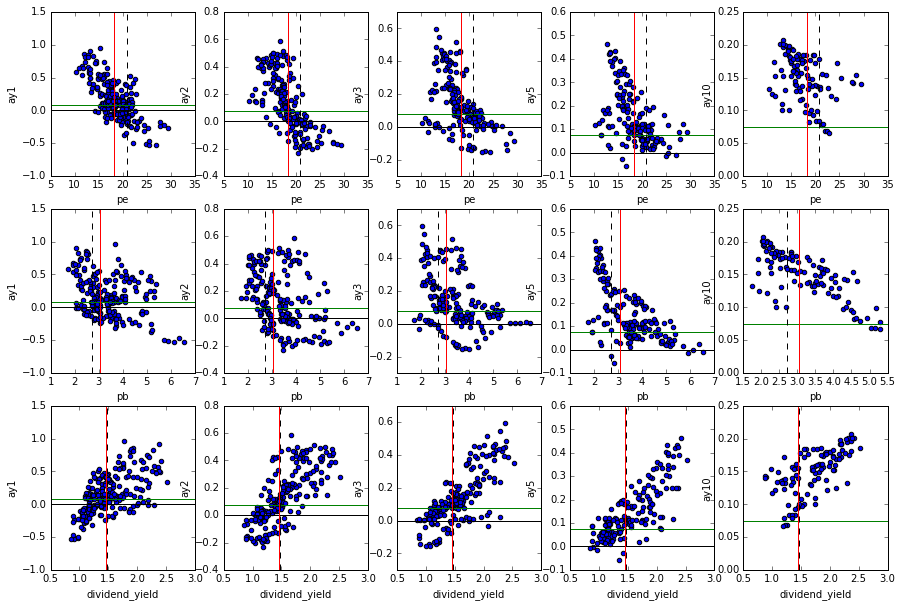

In [89]:
f, a = plt.subplots(3, 5, figsize=(15, 10))
#a = np.ndarray.flatten(a)
a = a.flatten()
py = list(itertools.product(['pe', 'pb', 'dividend_yield'], ['ay1', 'ay2', 'ay3', 'ay5', 'ay10']))
print(py)
for ax, py in zip(a, py):
    print(ax, py)
    p, y = py
    ax = df.plot(kind='scatter', x = p, y = y, ax = ax)
    ax.axhline(0, color='k')
    ax.axhline(0.075, color='g')
    ax.axvline(df[p].median(), color='r')
    ax.axvline(df[p][-1], color='k', linestyle='--')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000012F4EEB8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000001594F4A8>]], dtype=object)

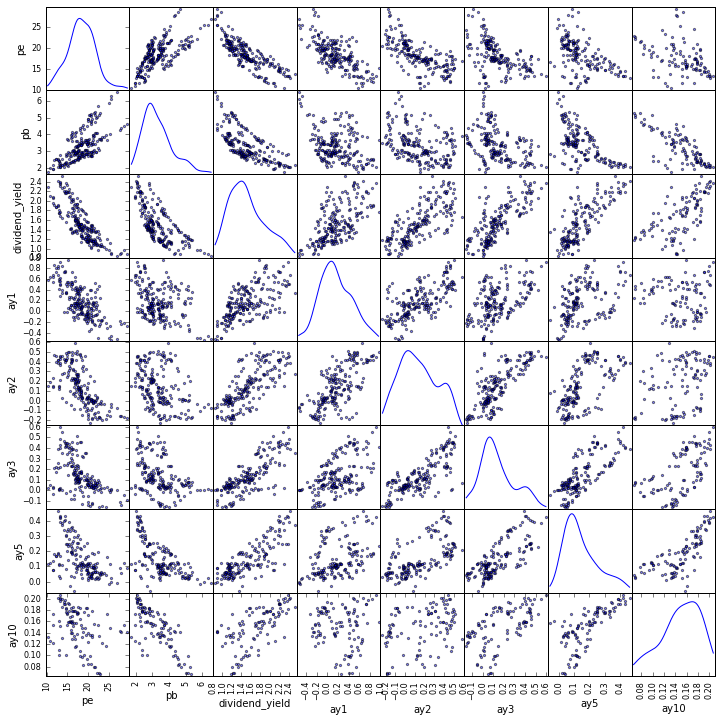

In [91]:
pd.scatter_matrix(df[['pe', 'pb', 'dividend_yield', 'ay1', 'ay2', 'ay3', 'ay5', 'ay10']], diagonal='kde', figsize=(12,12))

In [71]:
df.plot(kind='scatter', x='pe', y='y3')

In [142]:
smf.ols('y3 ~ dividend_yield', data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y3   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     277.6
Date:                Mon, 09 Jan 2017   Prob (F-statistic):           7.12e-39
Time:                        15:37:47   Log-Likelihood:                -117.09
No. Observations:                 190   AIC:                             238.2
Df Residuals:                     188   BIC:                             244.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept         -1.5446      0.131    -11.807      0.000        -1.803    -1.287
dividend_yield     1.3620      0.082     16.661      0.000         1.201     1.523
==============================================================================
Omnibus:                        6.814   Durbin-Watson:                   0.187
Prob(Omnibus):                  0.033   Jarque-Bera (JB):               11.365
Skew:                          -0.053   Prob(JB):                      0.00340
Kurtosis:                       4.194   Cond. No.                         8.79
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [152]:
pd.scatter_matrix(df[['pe', 'pb', 'dividend_yield', 'y1', 'y2', 'y3', 'y5', 'y10']], diagonal='kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001B9B1320>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000144D2A90>]], dtype=object)

In [153]:
plt.show()

In [154]:
df.y1.describe()

count    214.000000
mean       0.165022
std        0.301420
min       -0.530412
25%       -0.051861
50%        0.127416
75%        0.389749
max        0.956727
Name: y1, dtype: float64

In [156]:
df[['y1']].boxplot()

C:\Users\cande\Applications\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x1bad10b8>],
 'caps': [<matplotlib.lines.Line2D at 0x1ba45f98>,
 'fliers': [<matplotlib.lines.Line2D at 0x1b9be128>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1b896cc0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1bb1c978>,
  <matplotlib.lines.Line2D at 0x1ba5a240>]}

In [158]:
df.describe()

,high,low,close,pe,pb,dividend_yield,y1,y2,y3,y5,y10
count,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,214.000000,202.000000,190.000000,166.000000,106.000000
mean,13503.957788,12313.922080,13003.576504,18.410088,3.320398,1.521416,0.165022,0.339055,0.565860,1.203455,3.192339
std,8500.267530,8017.496038,8320.662566,3.338986,0.912495,0.374922,0.301420,0.468625,0.707105,1.243820,1.169575
min,3027.200000,2594.870000,2810.660000,10.270000,1.730000,0.850000,-0.530412,-0.409876,-0.397160,-0.261310,0.899041
25%,4915.497500,4213.932500,4562.307500,16.400000,2.710000,1.230000,-0.051861,-0.026428,0.096796,0.341406,2.434086
50%,14180.610000,12370.810000,13266.850000,18.285000,3.055000,1.455000,0.127416,0.258498,0.328352,0.718281,3.185817
75%,19721.665000,18141.130000,19067.355000,20.587500,3.725000,1.757500,0.389749,0.668949,0.860377,1.534495,4.123119
max,30024.740000,28044.490000,29361.500000,29.390000,6.540000,2.520000,0.956727,1.513582,3.068721,5.726293,5.589718


In [159]:
df.tail(2)

,high,low,close,pe,pb,dividend_yield,y1,y2,y3,y5,y10
date,,,,,,,,,,,
2016-12-01,26803.76,25753.74,26626.46,20.56,2.68,1.49,NaN,NaN,NaN,NaN,NaN
2017-01-01,27009.61,26447.06,26759.23,20.83,2.71,1.47,NaN,NaN,NaN,NaN,NaN


In [162]:
df[['y1', 'y2', 'y3', 'y5', 'y10']].boxplot()

C:\Users\cande\Applications\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x1e2fc9b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e301d30>,
 'fliers': [<matplotlib.lines.Line2D at 0x1e30ccf8>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1e306da0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x1e2fcb70>,
  <matplotlib.lines.Line2D at 0x1e3baa58>]}

In [163]:
plt.show()

In [176]:
ax = df.plot(kind='scatter', x='pe', y='y1')
ax.axhline(0)
ax.axvline(df.pe.median())

In [177]:
plt.show()

In [175]:
df.sort_values(by='y10', ascending=False)

,high,low,close,pe,pb,dividend_yield,y1,y2,y3,y5,y10
date,,,,,,,,,,,
2003-04-01,3221.90,2904.44,2959.79,13.21,2.06,2.37,0.910639,1.079350,3.068721,4.840722,5.589718
2002-10-01,3038.92,2828.48,2949.32,12.68,2.02,2.42,0.663729,0.923247,1.675980,5.726293,5.274456
2002-09-01,3227.62,2973.97,2991.36,13.13,2.17,2.32,0.488701,0.866579,1.886473,4.780347,5.272311
2003-05-01,3200.48,2934.78,3180.75,13.21,2.06,2.39,0.496383,1.111172,2.269232,4.160912,5.212466
2003-03-01,3311.57,3039.83,3048.72,13.74,2.14,2.28,0.833753,1.129687,2.699900,4.131478,5.178255
2003-01-01,3416.92,3199.18,3250.38,14.43,2.25,2.17,0.752309,1.016976,2.051917,4.429737,5.120817
2002-11-01,3245.98,2928.63,3228.82,13.22,2.07,2.36,0.562435,0.930826,1.721988,4.996987,4.989773
2001-10-01,3083.65,2718.41,2989.35,14.29,2.04,2.29,-0.013391,0.641450,0.897493,3.336026,4.922696
2001-09-01,3267.93,2594.87,2811.60,15.20,2.07,2.19,0.063935,0.583881,0.985919,3.429656,4.852098


In [198]:
ax = df[['ay1', 'ay2', 'ay3', 'ay5', 'ay10']].boxplot(return_type='axes')
ax.axhline(0.08)

In [199]:
plt.show()

In [197]:
df[df.ay5 < 0.08][['pe', 'pb', 'dividend_yield', 'ay5']]

,pe,pb,dividend_yield,ay5
date,,,,
1998-04-01,16.55,2.83,1.35,-0.058777
1998-05-01,15.74,2.69,1.42,-0.029075
1998-06-01,13.32,2.28,1.69,0.021027
1998-07-01,12.91,2.23,1.81,0.033835
1998-08-01,11.46,1.92,2.06,0.076670
1998-09-01,11.50,1.92,2.08,0.074976
1999-05-01,15.76,2.91,1.44,0.037283
1999-06-01,16.53,3.06,1.37,0.029795
1999-07-01,18.40,3.40,1.23,0.026237


In [195]:
plt.show()